# 1. Standard Scaling

Standard Scaling is a method to scale the data in such a way that the mean is 0 and the standard deviation is 1. This is done by subtracting the mean from each data point and then dividing by the standard deviation. This is a common method used in machine learning algorithms to scale the data before feeding it to the model.

The formula for standard scaling is given by:
z = (x - mean) / std

where z is the scaled value, x is the original value, mean is the mean of the data, and std is the standard deviation of the data.

In [15]:
# import Libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MaxAbsScaler,MinMaxScaler, RobustScaler

In [2]:
df = {
    'age': [25, 30, 35, 40, 45],
    'height': [5.5, 5.6, 5.7, 5.8, 5.9],
    'weight': [60, 65, 70, 75, 80]
}

In [3]:
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,5.5,60
1,30,5.6,65
2,35,5.7,70
3,40,5.8,75
4,45,5.9,80


In [10]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()


,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Min-Max Scaler

In [13]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()


,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# Max Abs Scaler

In [14]:
scaler = MaxAbsScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()



,age,height,weight
0,0.555556,0.932203,0.7500
1,0.666667,0.949153,0.8125
2,0.777778,0.966102,0.8750
3,0.888889,0.983051,0.9375
4,1.000000,1.000000,1.0000


# RobustScaler

In [16]:
scaler = RobustScaler()
scaled_df = scaler.fit_transform(df)

scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


# Transformations

In [17]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [23]:
np.random.seed(0)
df = np.random.exponential(size=100, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()


,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

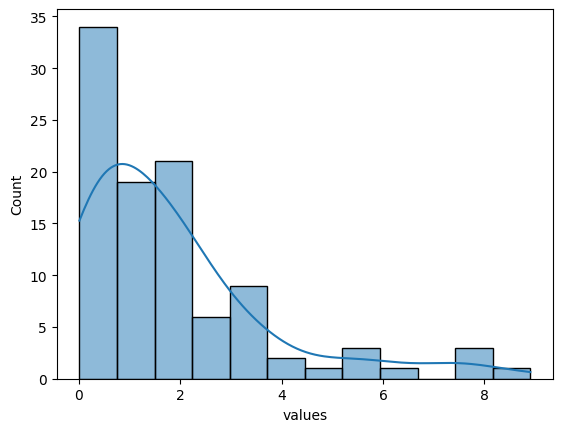

In [19]:
sns.histplot(df['values'], kde=True)

In [29]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
plt_boxcox = PowerTransformer(method='box-cox',standardize=False)
plt_yeo_johnson = PowerTransformer(method='yeo-johnson',standardize=False)
qt_transformer = QuantileTransformer(output_distribution='normal')

df['boxcox'] = plt_boxcox.fit_transform(df[['values']] + 1)
df['yeo_johnson'] = plt_yeo_johnson.fit_transform(df[['values']])
df['quantile'] = qt_transformer.fit_transform(df[['values']])
df.head()


c:\Users\gs085\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_data.py:2762: UserWarning: n_quantiles (1000) is greater than the total number of samples (100). n_quantiles is set to n_samples.
  warnings.warn(


,values,boxcox,yeo_johnson,quantile
0,1.591749,0.786770,0.786770,0.139710
1,2.511862,0.979086,0.979086,0.764710
2,1.846446,0.848711,0.848712,0.321971
3,1.574402,0.782239,0.782239,0.114185
4,1.102097,0.639388,0.639388,-0.165327


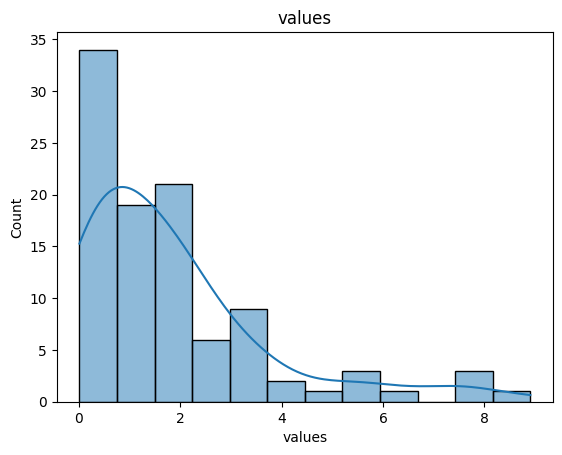

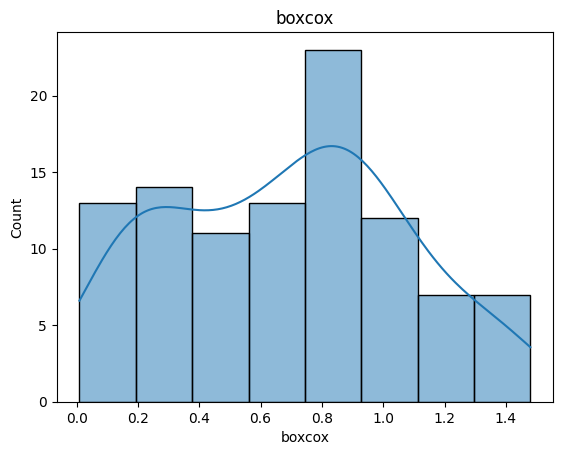

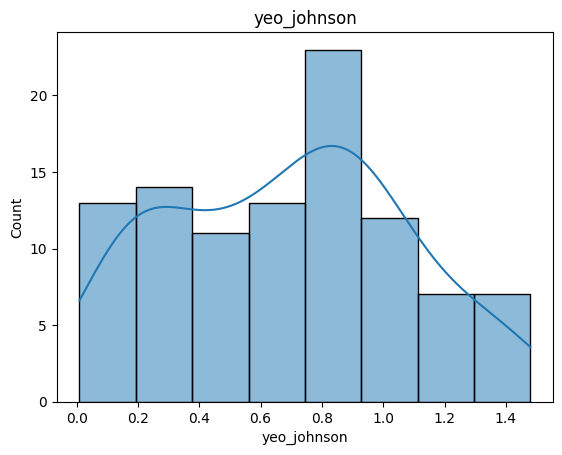

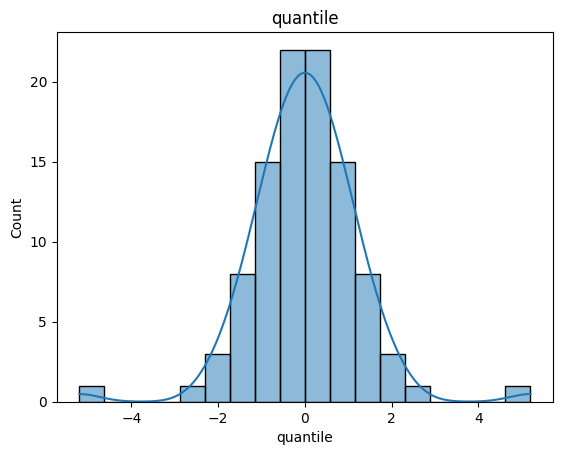

In [30]:
# create histogram for all columns using sns.hist  and kde=True use a for loop to iterate over all columns
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()